In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [336]:
df=pd.read_csv(r'/content/supermarket_sales - Sheet1.csv')
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [337]:
#Checking null counts of each column in dataframe 
for column in df.columns:
      print(column)
      print(df[column].isnull().sum())


Invoice ID
0
Branch
0
City
0
Customer type
0
Gender
0
Product line
0
Unit price
0
Quantity
0
Tax 5%
0
Total
0
Date
0
Time
0
Payment
0
cogs
0
gross margin percentage
0
gross income
0
Rating
0


In [338]:
#Checking value counts of each column in dataframe with dtype==Object
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        print(df[column].value_counts())


Invoice ID
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64
Branch
A    340
B    332
C    328
Name: Branch, dtype: int64
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Customer type
Member    501
Normal    499
Name: Customer type, dtype: int64
Gender
Female    501
Male      499
Name: Gender, dtype: int64
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Date
2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     18
1/8/2019     18
             ..
1/4/2019      6
2/28/2019     6
2/21/2019     6
3/17/2019     6
2/1/2019      6
Name: Date, Length: 89, dtype: int64
Time
19:48    7
14:42    7
17:38 

In [339]:
str_columns=[]
for i in df.columns:
    if df[i].dtype=='object':
        str_columns.append(i)

In [340]:
str_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

In [341]:
str_columns=['Invoice ID','Branch','City','Customer type','Gender','Product line','Payment']

In [342]:

df['Date'] = pd.to_datetime(df['Date'])

# extract month and year as a string in the format "MM-YYYY"
df['Month_Year'] = df['Date'].dt.strftime('%m-%Y')
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year


# assuming 'df' is your pandas dataframe and 'Date' column is already in datetime format
df['day_of_week'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].map({0: False, 1: False, 2: False, 3: False, 4: False, 5: True, 6: True})

# or using if/else statement:
# df['is_weekend'] = df['day_of_week'].apply(lambda x: True if x >= 5 else False)

# if you want to convert the 'is_weekend' column to string format:
df['is_weekend'] = df['is_weekend'].astype(str).replace({'True': 'Weekend', 'False': 'Weekday'})


In [343]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month_Year', 'month', 'day', 'year', 'day_of_week',
       'is_weekend'],
      dtype='object')

In [344]:
df_gb=df.groupby('Product line')['Rating'].mean().reset_index()

df_gb


,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


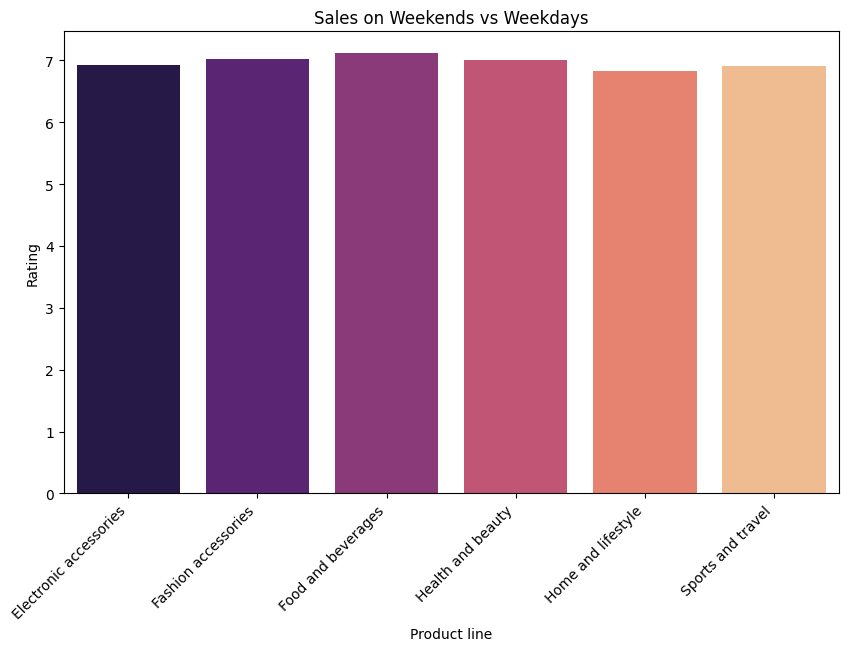

In [345]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_gb, x='Product line', y='Rating', palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Sales on Weekends vs Weekdays')
plt.show()

In [346]:
#groupby the Product with Cost of Goods V/S Total Sales
df_gb=df.groupby('Product line')['cogs','Total'].sum().reset_index()
sum=df.Total.sum()
df_gb['%_sales']=(df_gb['Total']/sum)*100
df_gb


,Product line,cogs,Total,%_sales
0,Electronic accessories,51750.03,54337.5315,16.824497
1,Fashion accessories,51719.90,54305.8950,16.814702
2,Food and beverages,53471.28,56144.8440,17.384094
3,Health and beauty,46851.18,49193.7390,15.231828
4,Home and lifestyle,51297.06,53861.9130,16.677232
5,Sports and travel,52497.93,55122.8265,17.067648


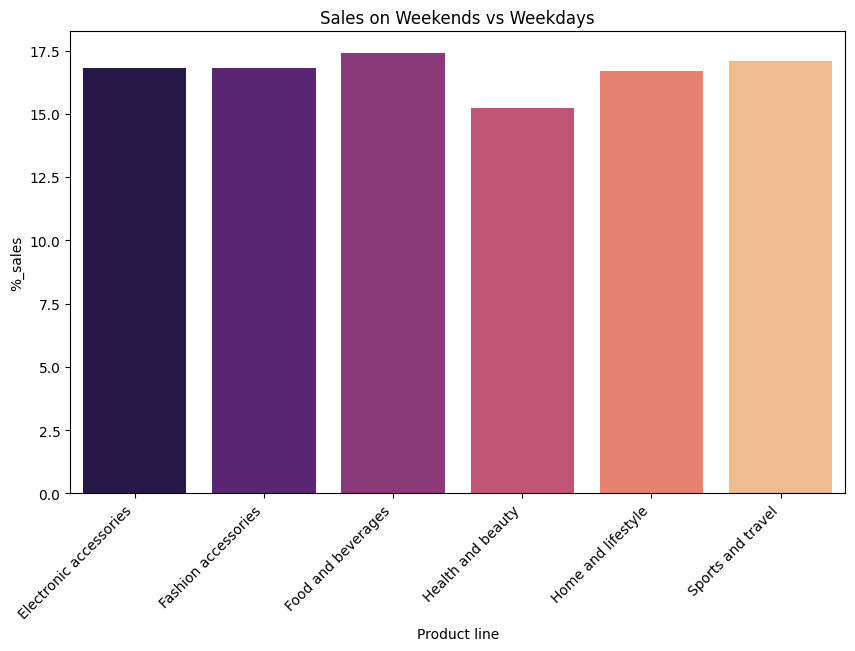

In [347]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_gb, x='Product line', y='%_sales', palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Sales on Weekends vs Weekdays')
plt.show()

In [348]:
df.groupby('is_weekend')['Total'].sum()

is_weekend
Weekday    222388.047
Weekend    100578.702
Name: Total, dtype: float64

Sales on Weekends vs Weekdays


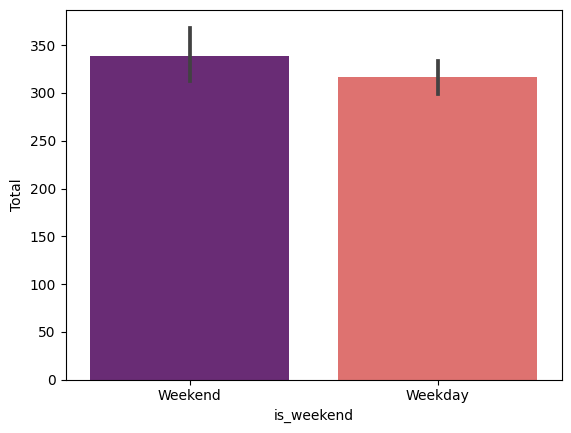

In [353]:
print('Sales on Weekends vs Weekdays')
sns.barplot(data=df,x='is_weekend', y='Total',palette='magma')
plt.show()




Total Sales on month


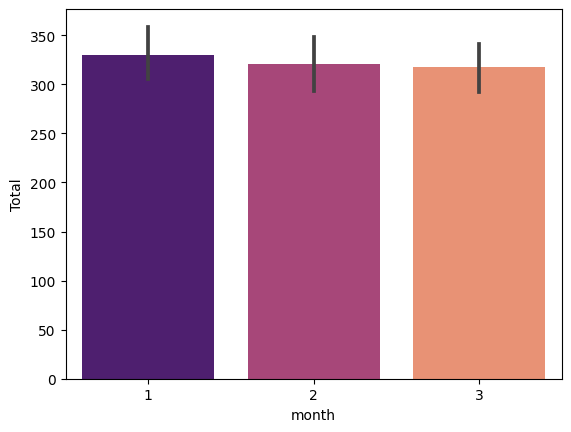

In [355]:
print('Total Sales on month')

sns.barplot(data=df,x='month', y='Total',palette='magma')
plt.show()

In [356]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month_Year', 'month', 'day', 'year', 'day_of_week',
       'is_weekend'],
      dtype='object')

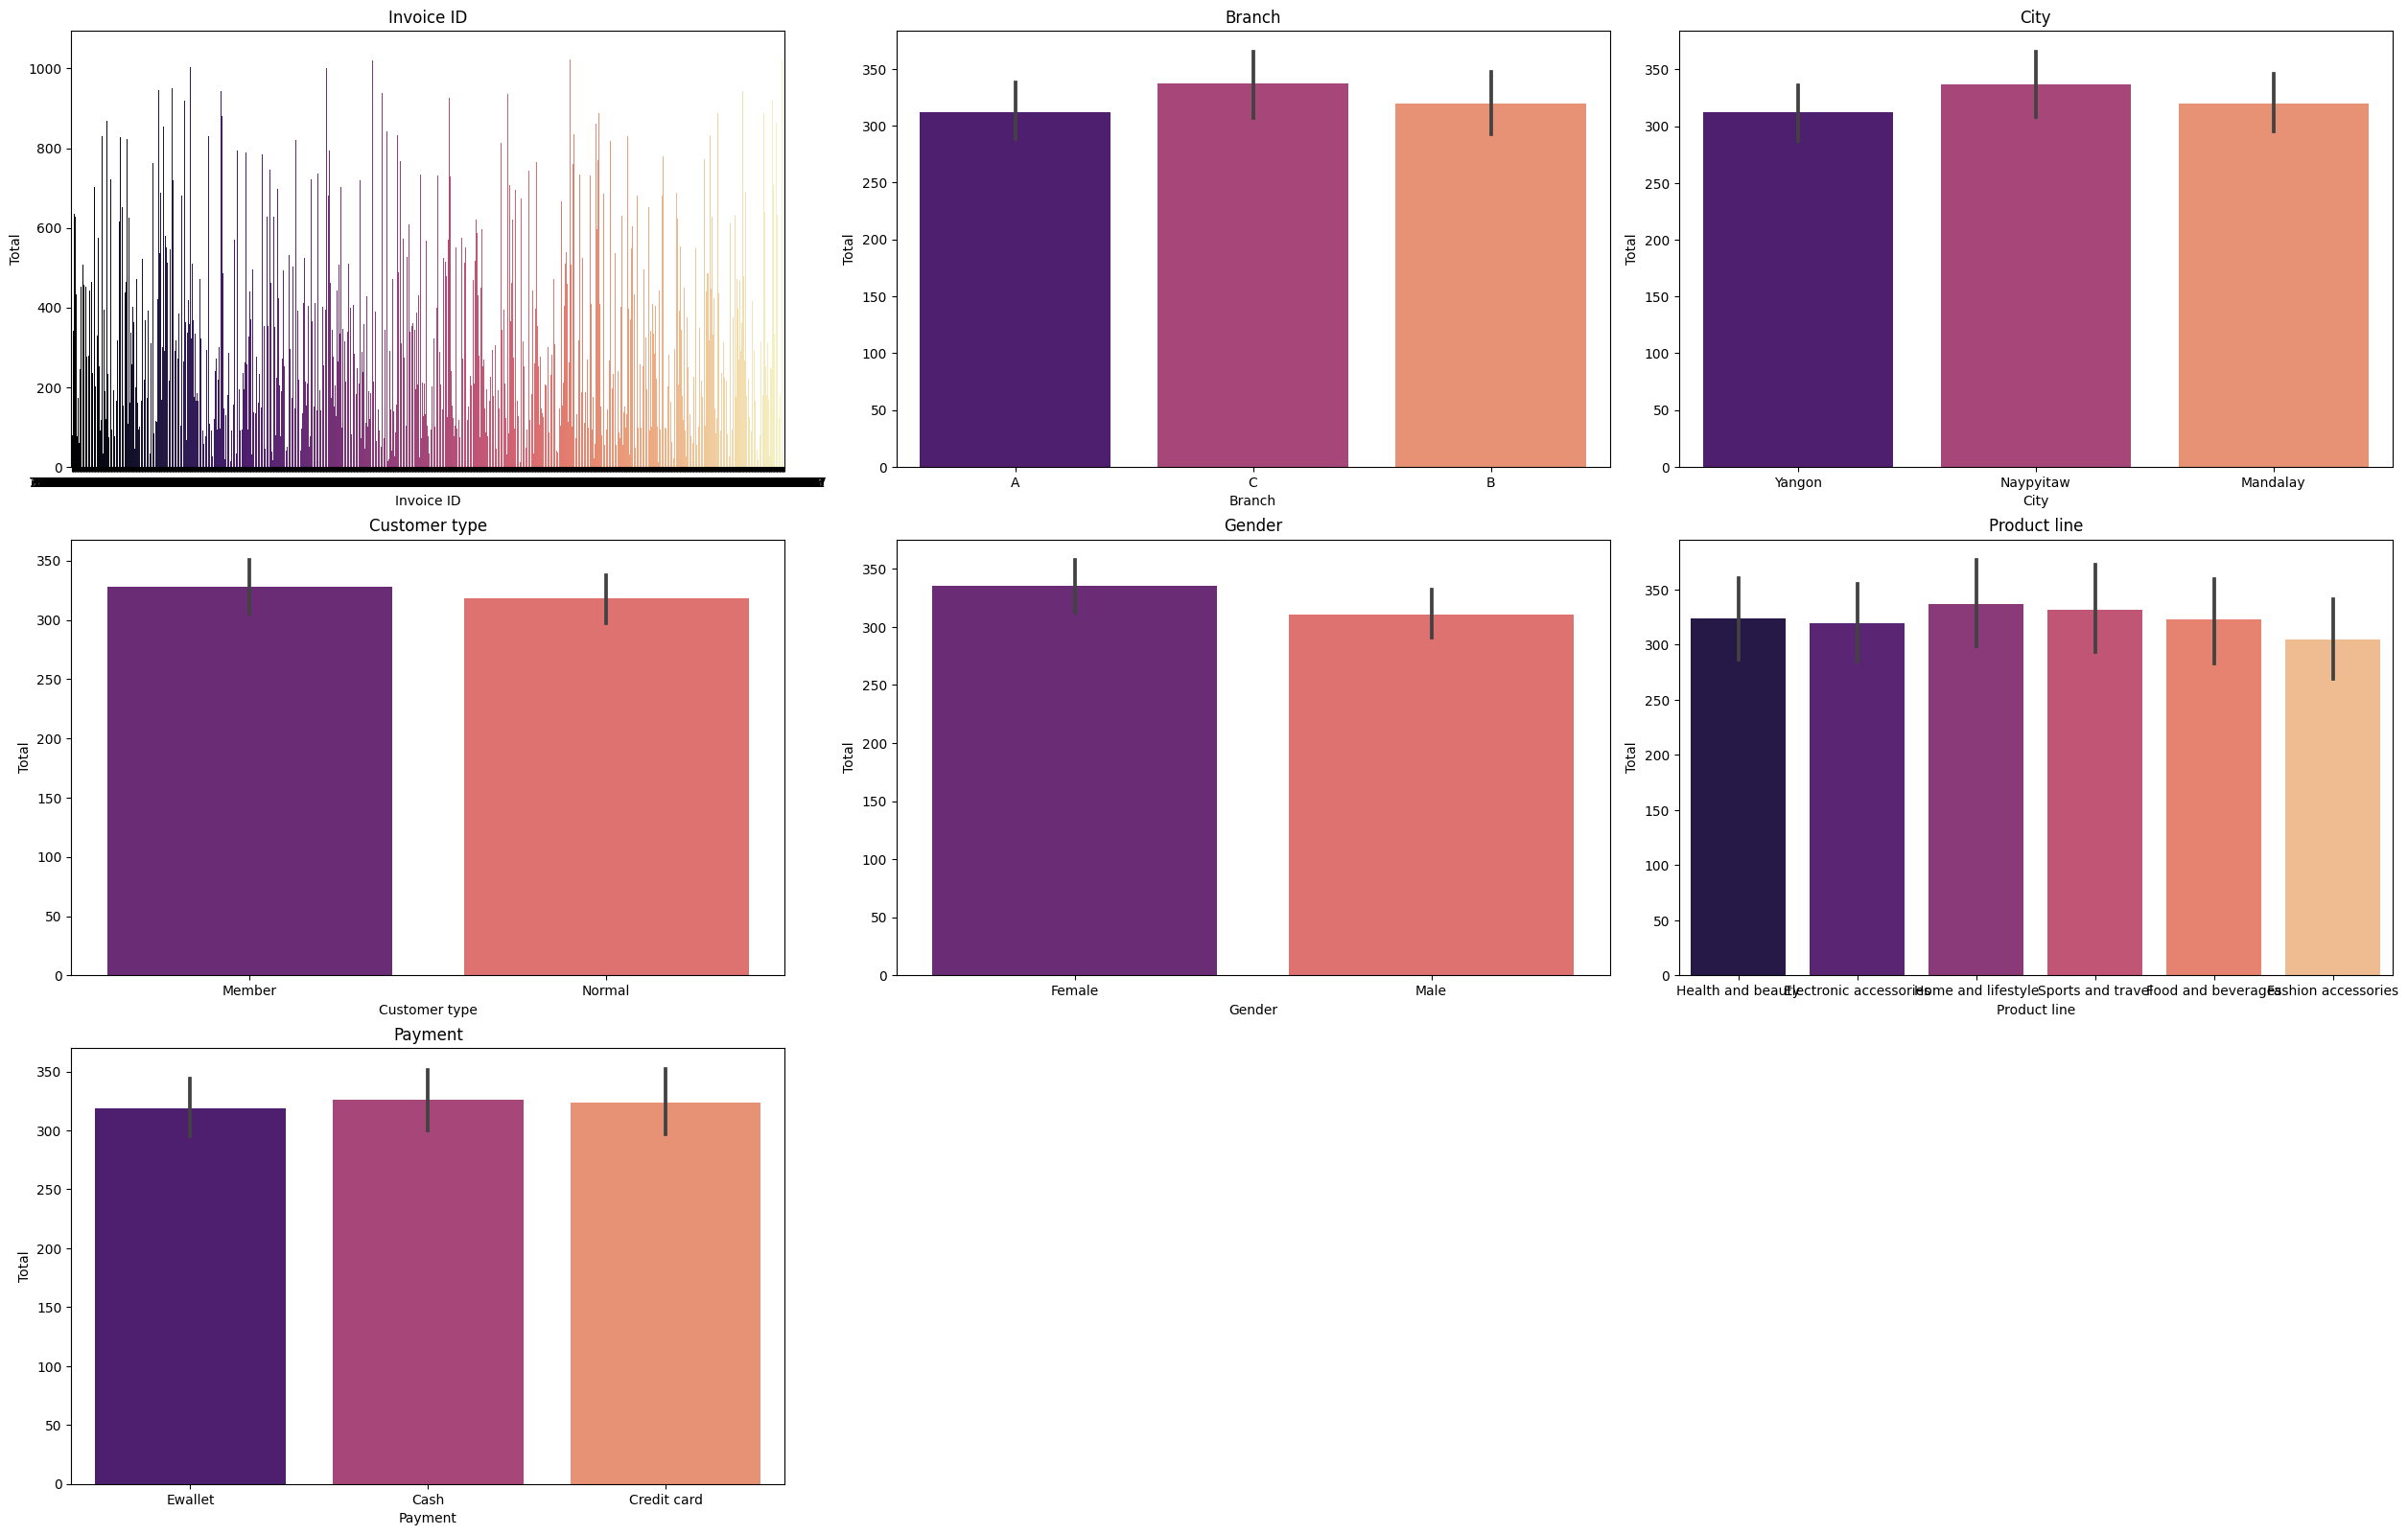

In [357]:
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(str_columns)):
    plt.subplot(5,3,i+1)
    sns.barplot(data=df,x=str_columns[i], y='Total',palette='magma')
    plt.title(str_columns[i])
plt.show()

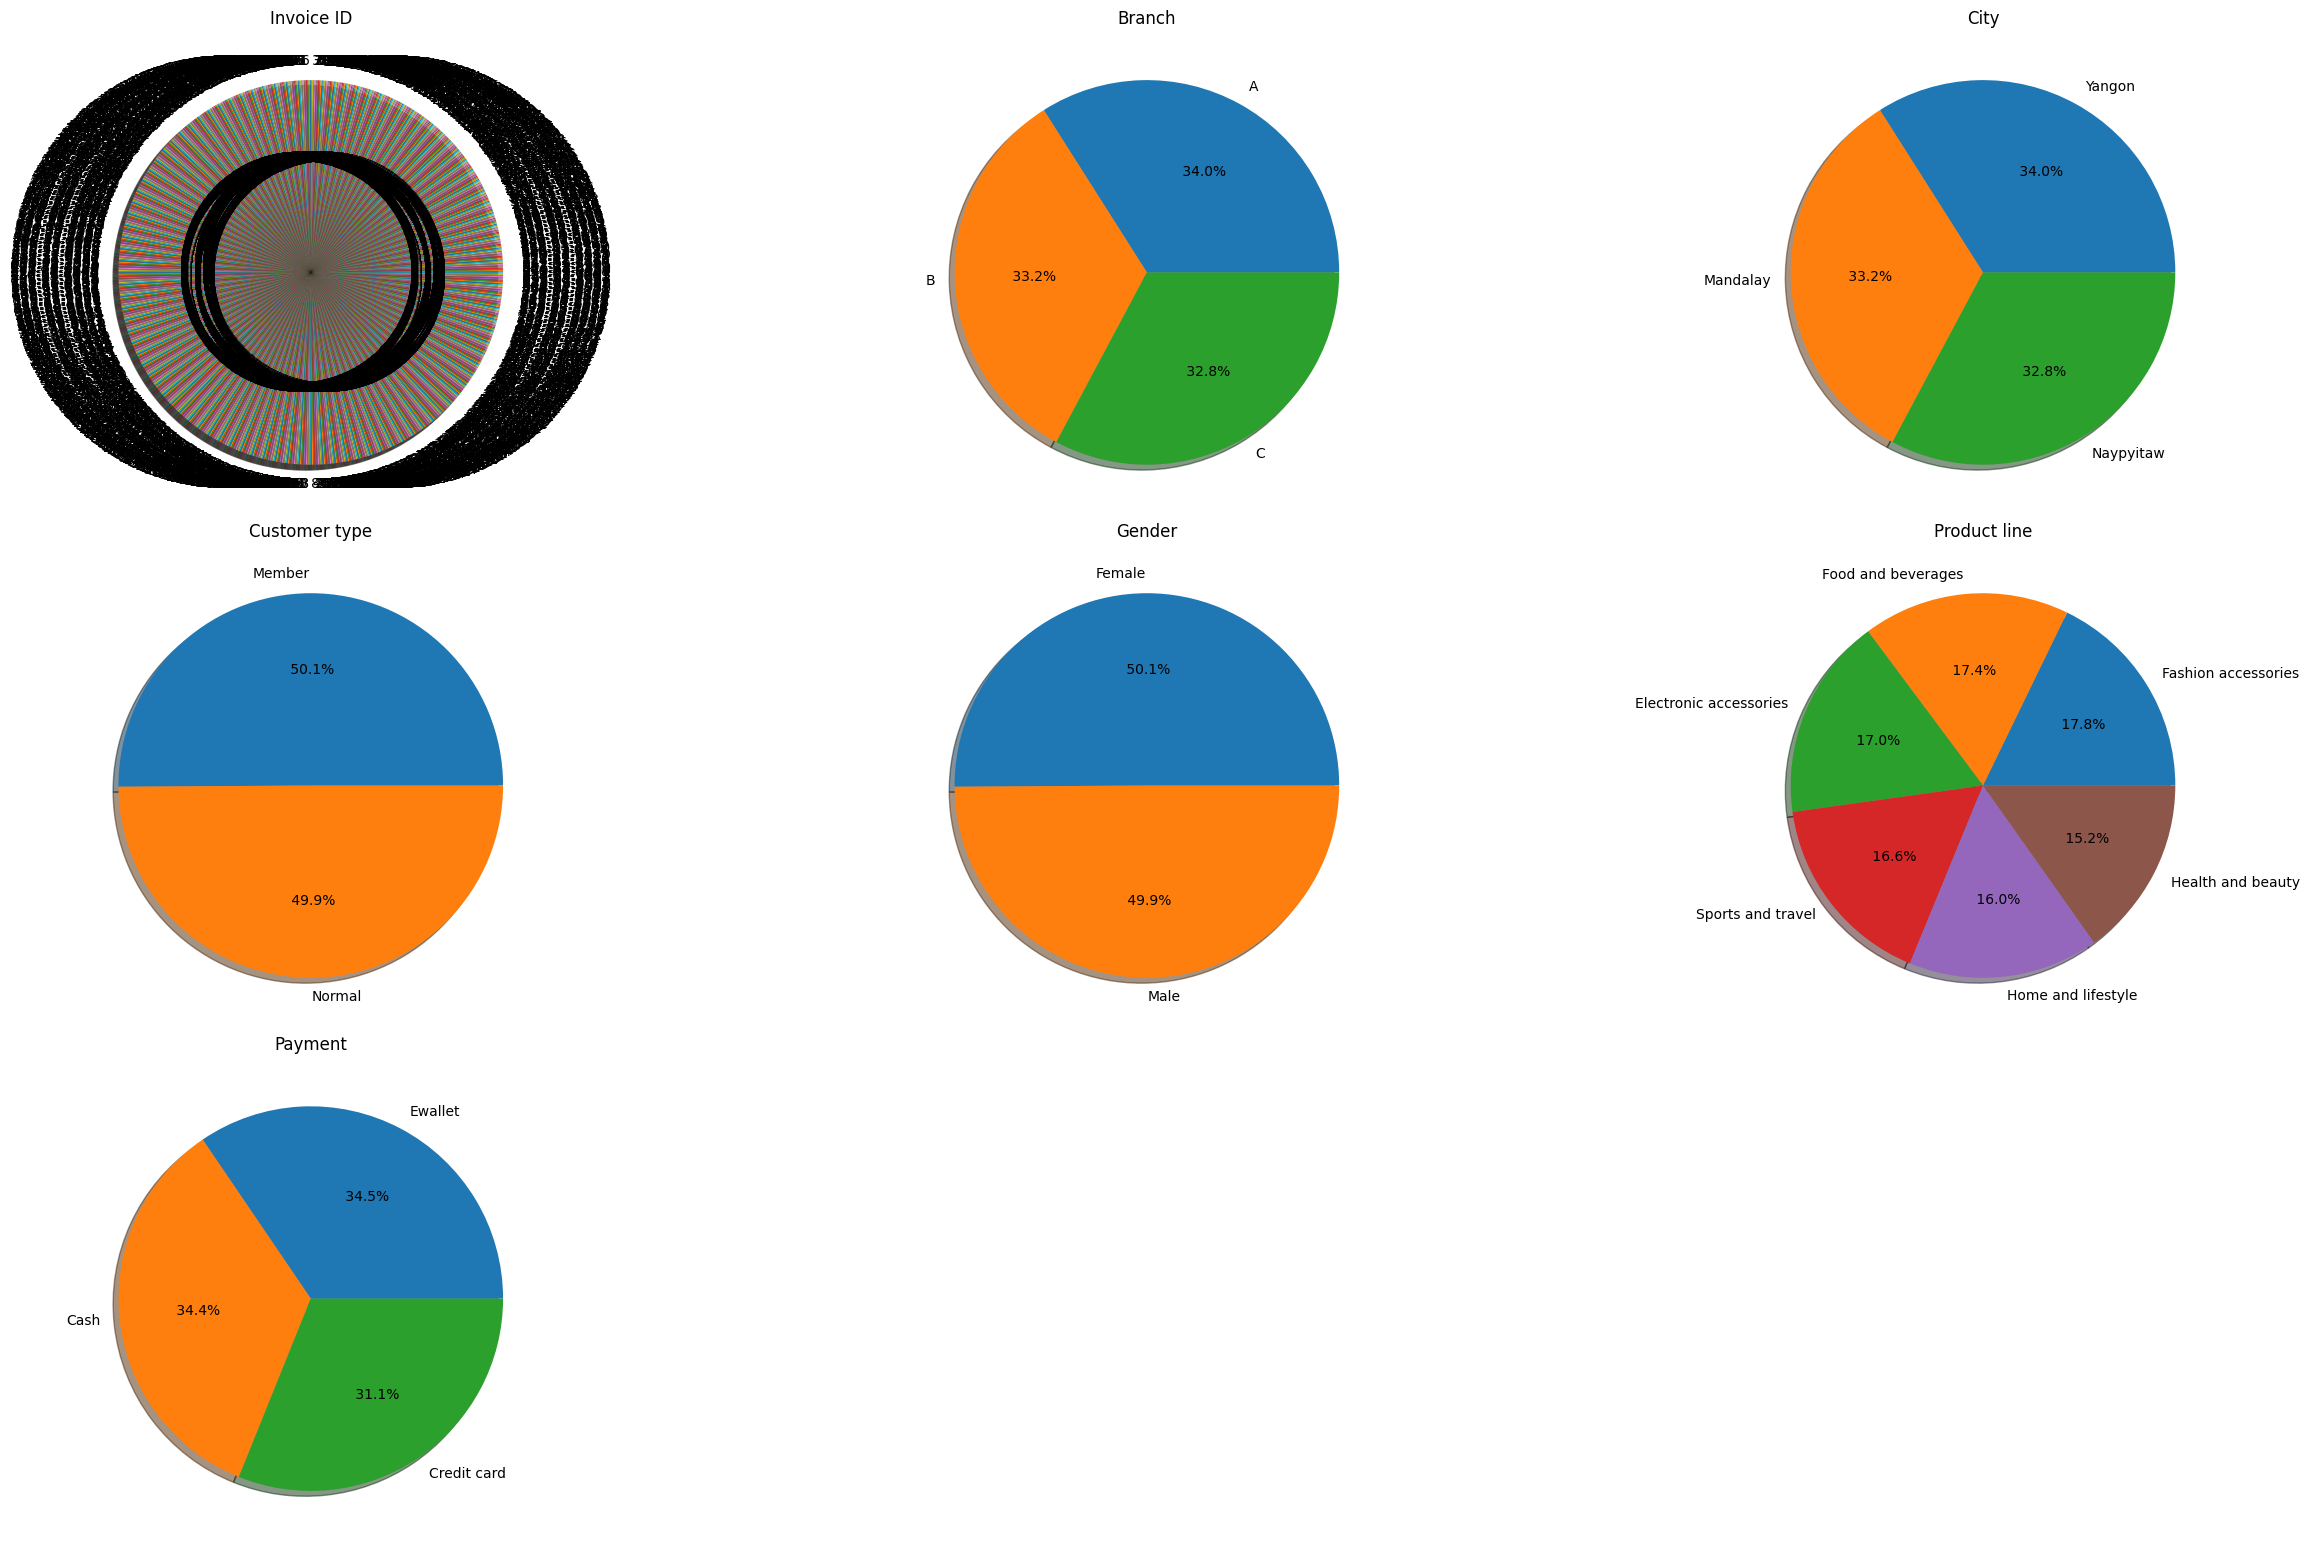

In [358]:
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(str_columns)):
    plt.subplot(5,3,i+1)
    a=df[str_columns[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct="% .1f%%",shadow=True)
    plt.title(str_columns[i])
plt.show()

In [359]:
str_columns
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# iterate over all columns in the DataFrame
for column in str_columns:
        # fit and transform the column with the LabelEncoder object
        df[column] = le.fit_transform(df[column])


In [282]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month_Year', 'month', 'day', 'year', 'day_of_week',
       'is_weekend'],
      dtype='object')

In [283]:
df.head()
df.drop(columns=['Invoice ID','Time'],inplace=True,axis=1)

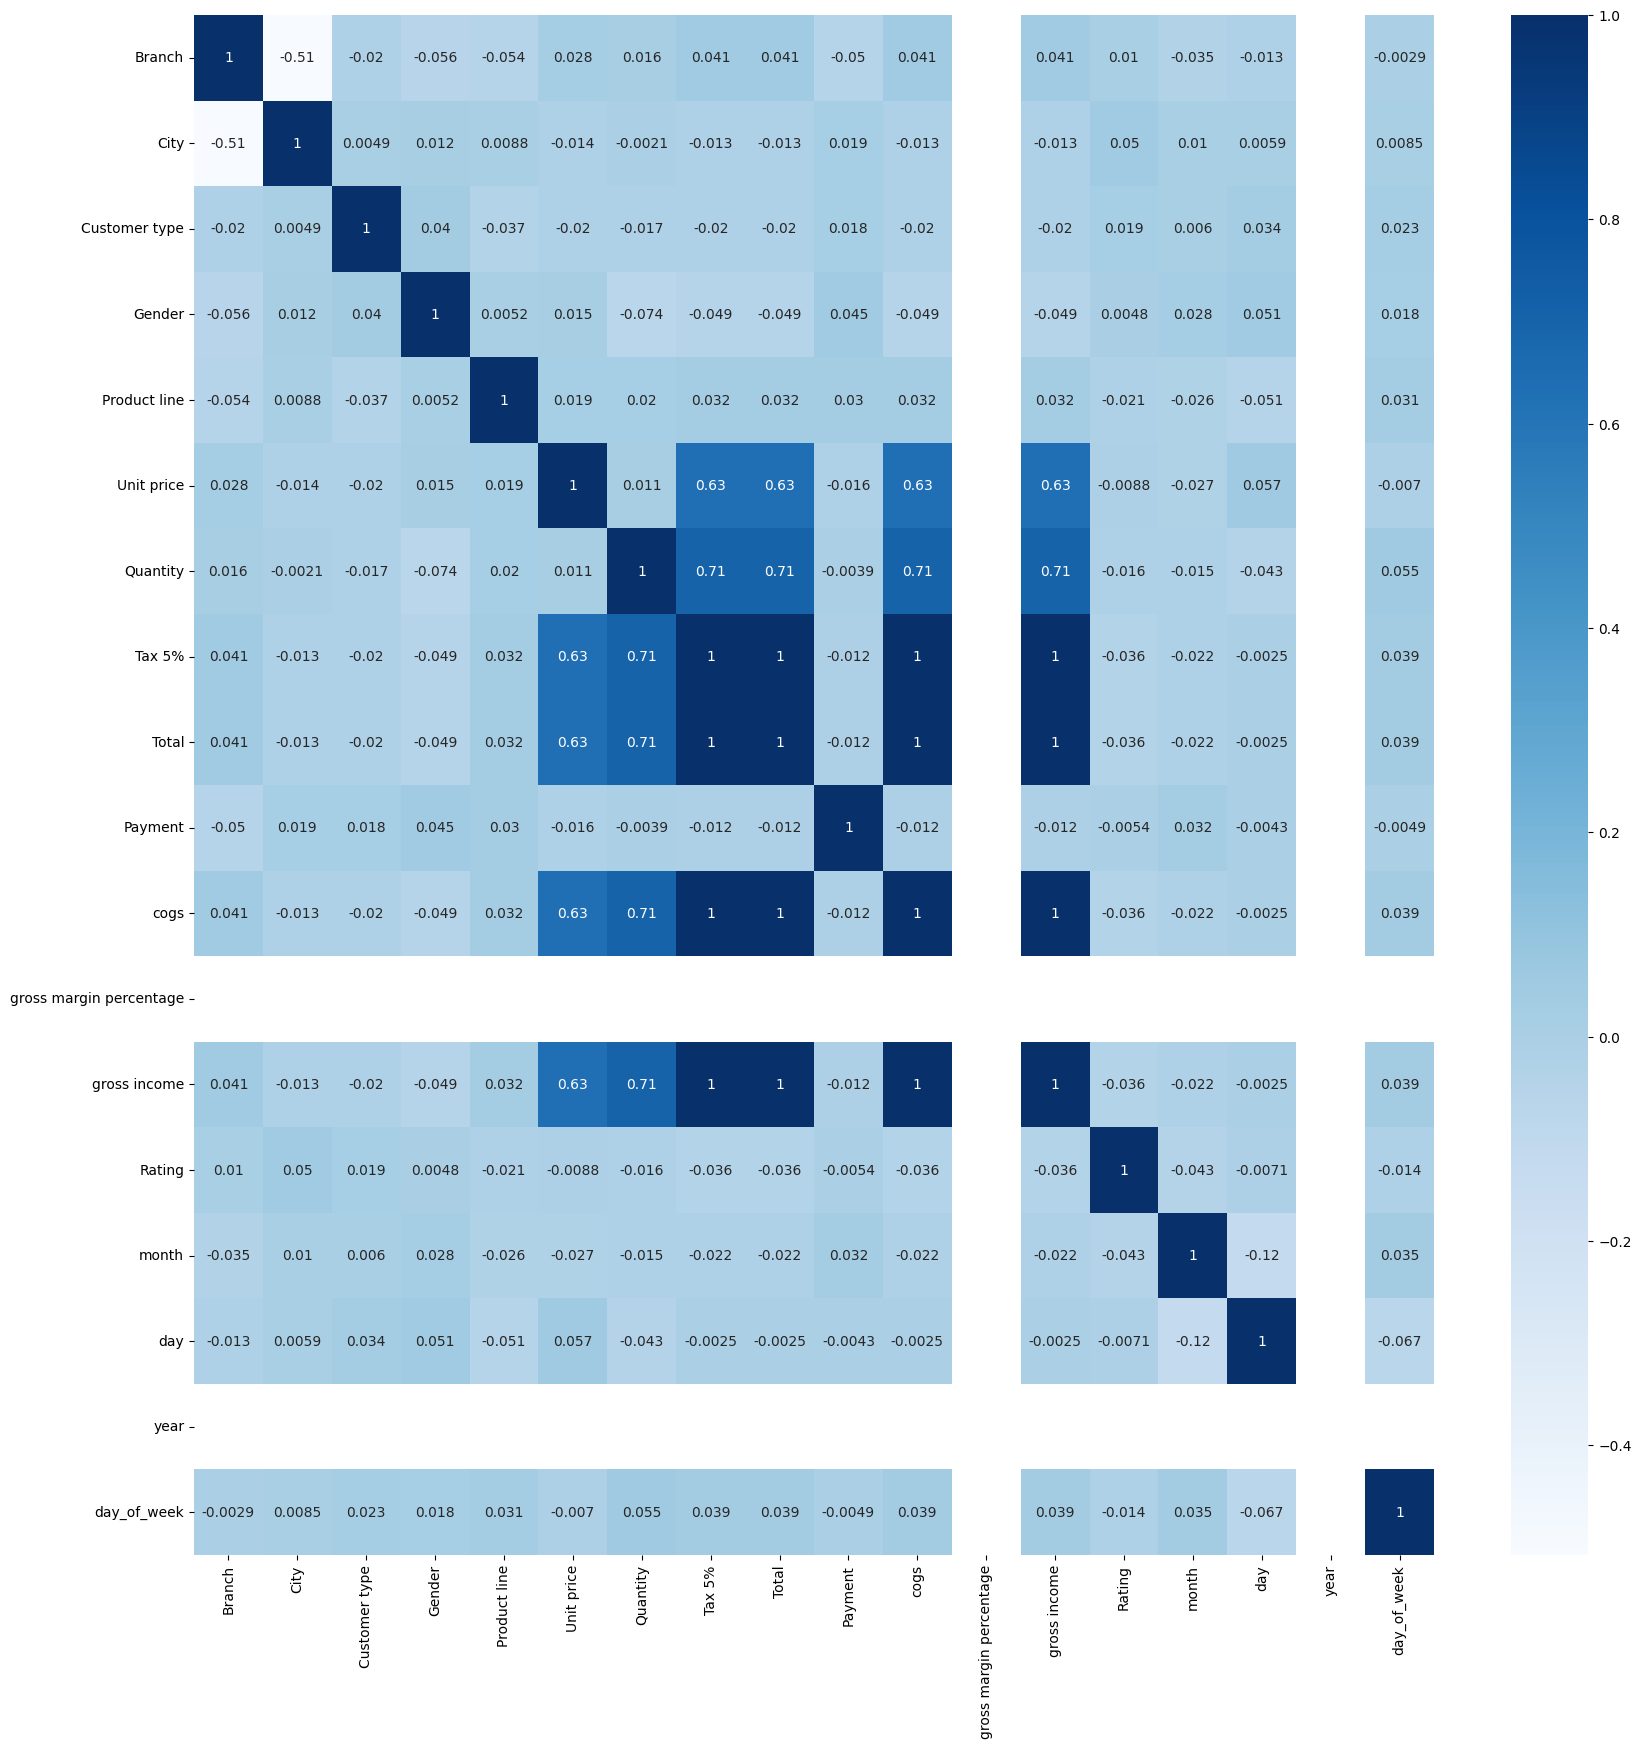

In [284]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

In [285]:
def check_no(df):
    new = df.corr()
    z = {}
    for col in new.columns:
        for row in new.index:
            if new.loc[row, col] > 0.95 and row != col:
                if col not in z:
                    z[col] = [row]
                else:
                    z[col].append(row)
    return z


In [286]:
check_no(df)

{'Tax 5%': ['Total', 'cogs', 'gross income'],
 'Total': ['Tax 5%', 'cogs', 'gross income'],
 'cogs': ['Tax 5%', 'Total', 'gross income'],
 'gross income': ['Tax 5%', 'Total', 'cogs']}

In [287]:
df.drop(columns=['Tax 5%', 'cogs', 'gross income'],inplace=True,axis=1)

In [288]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Total', 'Date', 'Payment',
       'gross margin percentage', 'Rating', 'Month_Year', 'month', 'day',
       'year', 'day_of_week', 'is_weekend'],
      dtype='object')

In [310]:
X=df.loc[:,['Rating','Branch', 'City', 'Customer type', 'Gender', 'Product line','Unit price', 'Quantity', 'Total', 'Payment', 'gross margin percentage']]
X
Y=df['Total']
Y

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64

In [321]:
X

array([[ 1.23844341e+00, -1.20897001e+00,  1.21017372e+00, ...,
         9.19606849e-01,  1.20352798e+00,  0.00000000e+00],
       [ 1.52952681e+00,  1.23833770e+00, -9.75946548e-03, ...,
        -9.87729558e-01, -1.20593745e+00,  0.00000000e+00],
       [ 2.48759870e-01, -1.20897001e+00,  1.21017372e+00, ...,
         7.14460541e-02, -1.20473272e-03,  0.00000000e+00],
       ...,
       [ 4.23409907e-01, -1.20897001e+00,  1.21017372e+00, ...,
        -1.17810859e+00, -1.20593745e+00,  0.00000000e+00],
       [-1.67239054e+00, -1.20897001e+00,  1.21017372e+00, ...,
        -1.03293176e+00, -1.20593745e+00,  0.00000000e+00],
       [-2.16973563e-01, -1.20897001e+00,  1.21017372e+00, ...,
         1.32783657e+00, -1.20593745e+00,  0.00000000e+00]])

In [322]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X = scaler.fit_transform(X)


In [323]:
print('X_Shape',X.shape)
print('Y_Shape',Y.shape)

X_Shape (1000, 11)
Y_Shape (1000,)


In [314]:
Y=Y.astype('int')

In [315]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [316]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (700, 11)
x_test (300, 11)
y_train (700,)
y_test (300,)


In [361]:
# create a random forest regressor object
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_reg = RandomForestRegressor(max_depth=3,max_features='auto',n_estimators=50)

# train the random forest regressor on the training data
rf_reg.fit(x_train, y_train)

# use the trained model to make predictions on the test data
y_pred = rf_reg.predict(x_test)

# calculate the mean squared error and R^2 score of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 565.9355338411572
R^2 Score: 0.9904526865269934


In [362]:
#After GridSearch the Model accuracy is now 0.99==99%

In [363]:
from sklearn.model_selection import GridSearchCV

In [370]:
#Define the Regressor
model = RandomForestRegressor(random_state=1)
# creating a dic for the grid
param_grid = {
    'n_estimators':[50, 100, 200, 500, 1000],
    'max_depth': [3, 5, None],
    'max_features': ['auto','sqrt', 'log2']
}
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# defining the CV
cv = StratifiedKFold(n_splits=5)
# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=cv,scoring='f1_weighted')
# estimator===model used(random forest,Linear etc)
# para=parameters used 
# cv=StratifiedKFold(n_splits=5)
# scoring='f1_weighted'
# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(x_train,y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: nan using {'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50}


In [368]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
model.fit(x_train, y_train)

# Predict on the testing set and calculate the mean squared error (MSE)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("r2:", r2)

MSE: 1.336971357423184
r2: 0.9999774453380457
